In [1]:
!pip install -e ..

Obtaining file:///home/chris/Projects/ml_scratch
  Attempting uninstall: ml-scratch
    Found existing installation: ml-scratch 0.0.1
    Uninstalling ml-scratch-0.0.1:
      Successfully uninstalled ml-scratch-0.0.1
  Running setup.py develop for ml-scratch


In [2]:
import ml_scratch as ml
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Linear Regression from ml_scratch

In [4]:
lr = ml.LinearRegression()
scaler = StandardScaler()

In [5]:
dataset = fetch_california_housing( as_frame=True)
features = dataset['data']
target = dataset['target']

In [6]:
features.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [7]:
target.tail()

20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, dtype: float64

In [8]:
X = np.array(features)
X = scaler.fit_transform(X)
X.shape

(20640, 8)

In [9]:
y = np.array(target)
y.shape

(20640,)

In [10]:
X

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [11]:
lr.fit(X, y, method = 'numerical', iterations = 100, nu = 1e-5)

iteration: 0, cost: 1.8827903579749468
iteration: 10, cost: 0.3251848078336717
iteration: 20, cost: 0.29638247555004843
iteration: 30, cost: 0.2868436577477366
iteration: 40, cost: 0.28011611251779434
iteration: 50, cost: 0.27526328047248017
iteration: 60, cost: 0.2717533849610226
iteration: 70, cost: 0.2692089557804221
iteration: 80, cost: 0.26735974006474805
iteration: 90, cost: 0.26601198224865774


In [12]:
y_predicted_num = lr.predict(X)
y_predicted_num

array([4.13864816, 3.9539422 , 3.70889342, ..., 0.32318385, 0.45809899,
       0.66129752])

In [13]:
lr.fit(X, y, method = 'analytic')
y_predicted_analytic = lr.predict(X)
y_predicted_analytic

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

(array([4.000e+00, 2.000e+00, 1.300e+01, 2.200e+01, 2.300e+01, 5.900e+01,
        1.040e+02, 1.120e+02, 1.800e+02, 2.330e+02, 2.640e+02, 4.390e+02,
        5.910e+02, 9.480e+02, 1.494e+03, 2.225e+03, 3.276e+03, 3.845e+03,
        3.729e+03, 2.050e+03, 6.930e+02, 1.980e+02, 5.300e+01, 3.200e+01,
        3.100e+01, 6.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([-4.24083291, -3.98494775, -3.72906258, -3.47317741, -3.21729224,
        -2.96140707, -2.7055219 , -2.44963674, -2.19375157, -1.9378664 ,
        -1.68198123, -1.42609606, -1.17021089, -0.91432573, -0.65844056,
        -0.40255539, -0.14667022,  0.10921495,  0.36510012,  0.62098528,
         0.87687045,  1.13275562,  1.38864079,  1.64452596,  1.90041113,
         2.15629629,  2.41218146,  2.66806663,  2.9239518 ,  3.17983697,
         3.43572213,  3.6916073 ,  3.94749247,  4.20337764,  4.4

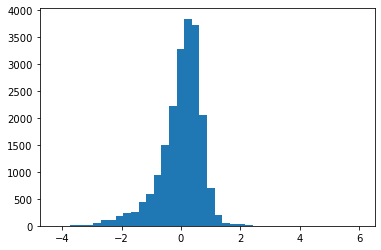

In [14]:
plt.hist(y_predicted_num - y, bins=40)

(array([3.000e+00, 5.000e+00, 1.600e+01, 2.600e+01, 4.600e+01, 1.070e+02,
        1.280e+02, 2.200e+02, 2.700e+02, 3.780e+02, 5.580e+02, 9.990e+02,
        1.550e+03, 2.477e+03, 3.766e+03, 4.468e+03, 3.557e+03, 1.447e+03,
        4.050e+02, 1.170e+02, 5.000e+01, 2.500e+01, 8.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.17489595, -3.88689166, -3.59888737, -3.31088308, -3.02287878,
        -2.73487449, -2.4468702 , -2.1588659 , -1.87086161, -1.58285732,
        -1.29485303, -1.00684873, -0.71884444, -0.43084015, -0.14283585,
         0.14516844,  0.43317273,  0.72117702,  1.00918132,  1.29718561,
         1.5851899 ,  1.8731942 ,  2.16119849,  2.44920278,  2.73720707,
         3.02521137,  3.31321566,  3.60121995,  3.88922425,  4.17722854,
         4.46523283,  4.75323713,  5.04124142,  5.32924571,  5.6

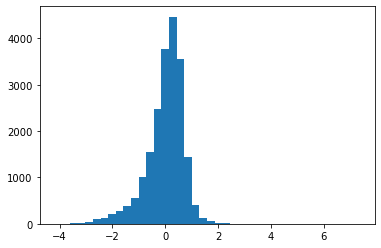

In [15]:
plt.hist(y_predicted_analytic - y, bins=40)

# Linear Regression from Scikit-Learn

In [16]:
from sklearn.linear_model import LinearRegression
lr_sk = LinearRegression()
lr_sk.fit(X,y)

LinearRegression()

In [17]:
y_sk = lr_sk.predict(X)

(array([3.000e+00, 5.000e+00, 1.600e+01, 2.600e+01, 4.600e+01, 1.070e+02,
        1.280e+02, 2.200e+02, 2.700e+02, 3.780e+02, 5.580e+02, 9.990e+02,
        1.550e+03, 2.477e+03, 3.766e+03, 4.468e+03, 3.557e+03, 1.447e+03,
        4.050e+02, 1.170e+02, 5.000e+01, 2.500e+01, 8.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-4.17489595, -3.88689166, -3.59888737, -3.31088308, -3.02287878,
        -2.73487449, -2.4468702 , -2.1588659 , -1.87086161, -1.58285732,
        -1.29485303, -1.00684873, -0.71884444, -0.43084015, -0.14283585,
         0.14516844,  0.43317273,  0.72117702,  1.00918132,  1.29718561,
         1.5851899 ,  1.8731942 ,  2.16119849,  2.44920278,  2.73720707,
         3.02521137,  3.31321566,  3.60121995,  3.88922425,  4.17722854,
         4.46523283,  4.75323713,  5.04124142,  5.32924571,  5.6

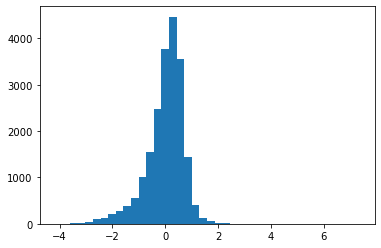

In [18]:
plt.hist(y_sk - y, bins=40)